In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Load Merged Resting State fMRI data

In [2]:
rs = pd.read_csv('data/abcd5.0_rsmri_cor_var_insula.csv')
se_nms = rs.columns[:2]
rs.describe()

,rsfmri_var_cdk_insulalh,rsfmri_var_cdk_insularh,rsfmri_var_cdk_rlaclatelh,rsfmri_var_cdk_rlaclaterh,rsfmri_var_cdk_entorhinallh,rsfmri_var_cdk_entorhinalrh,rsfmri_var_scs_amygdalalh,rsfmri_var_scs_amygdalarh,rsfmri_var_scs_hpuslh,rsfmri_var_scs_hpusrh,...,rsfmri_c_ngd_sa_ngd_dt,rsfmri_c_ngd_sa_ngd_dla,rsfmri_c_ngd_sa_ngd_fo,rsfmri_c_ngd_sa_ngd_n,rsfmri_c_ngd_sa_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs
count,22123.000000,22123.000000,22123.000000,22123.000000,22119.000000,22117.000000,22120.000000,22121.000000,22122.000000,22122.000000,...,22111.000000,22115.000000,22118.000000,22077.000000,22119.000000,22122.000000,22083.000000,22121.000000,22109.000000,22118.000000
mean,0.016252,0.019486,0.050931,0.047161,0.255551,0.332234,0.050596,0.049172,0.027318,0.025767,...,0.074933,-0.038382,0.088988,0.013352,-0.073336,0.384927,-0.063053,-0.035251,0.076930,-0.084728
std,0.009114,0.015326,0.040441,0.036044,0.548462,0.719850,0.069901,0.070195,0.018367,0.017386,...,0.064052,0.064894,0.065530,0.034385,0.090625,0.126906,0.064151,0.082029,0.068127,0.068539
min,0.000123,0.000116,0.000657,0.000562,0.002267,0.001478,0.000142,0.000449,0.000248,0.000232,...,-0.487964,-0.621764,-0.578405,-0.224064,-0.756174,-0.292921,-0.702428,-0.851401,-0.280655,-0.695774
25%,0.011090,0.013284,0.031932,0.029654,0.044347,0.053302,0.027278,0.025243,0.018656,0.017476,...,0.032929,-0.079894,0.046549,-0.008089,-0.131350,0.300096,-0.100443,-0.084695,0.032563,-0.127235
50%,0.014629,0.017618,0.042891,0.039559,0.087871,0.116479,0.036858,0.034360,0.023949,0.022355,...,0.073313,-0.037247,0.088113,0.012784,-0.073014,0.381510,-0.059755,-0.035527,0.074671,-0.082925
75%,0.019410,0.023411,0.058584,0.054124,0.235679,0.315127,0.052679,0.049960,0.031153,0.029180,...,0.115480,0.003309,0.130630,0.033979,-0.016790,0.465139,-0.022193,0.015141,0.119513,-0.040581
max,0.601306,1.714728,2.065643,2.150329,20.675511,26.378261,4.246139,2.465912,0.676444,0.472647,...,0.577563,0.402305,0.662740,0.345232,0.803698,1.558666,0.494166,0.879750,0.835934,0.477503


In [3]:
print(rs.shape)
rs['eventname'].value_counts()

(22123, 77)


eventname
baseline_year_1_arm_1       11219
2_year_follow_up_y_arm_1     7911
4_year_follow_up_y_arm_1     2993
Name: count, dtype: int64

### Set index of rs df to subject id, to match ders df

In [4]:
rs.set_index('src_subject_id', inplace=True)
rs.head()

,rsfmri_var_cdk_insulalh,rsfmri_var_cdk_insularh,rsfmri_var_cdk_rlaclatelh,rsfmri_var_cdk_rlaclaterh,rsfmri_var_cdk_entorhinallh,rsfmri_var_cdk_entorhinalrh,eventname,rsfmri_var_scs_amygdalalh,rsfmri_var_scs_amygdalarh,rsfmri_var_scs_hpuslh,...,rsfmri_c_ngd_sa_ngd_dt,rsfmri_c_ngd_sa_ngd_dla,rsfmri_c_ngd_sa_ngd_fo,rsfmri_c_ngd_sa_ngd_n,rsfmri_c_ngd_sa_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs
src_subject_id,,,,,,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,0.032260,0.052060,0.071868,0.052642,0.078200,0.080552,baseline_year_1_arm_1,0.033267,0.027442,0.051209,...,0.110278,-0.043350,0.215066,0.023004,-0.158642,0.511476,-0.110895,0.082378,0.156427,-0.150867
NDAR_INV005V6D2C,0.013590,0.012886,0.027370,0.034198,0.362633,0.380730,baseline_year_1_arm_1,0.069349,0.069791,0.030952,...,0.033933,-0.082881,0.054303,-0.014094,-0.188355,0.264914,0.003988,0.025883,0.093761,-0.065420
NDAR_INV007W6H7B,0.011214,0.018393,0.039584,0.051270,0.103505,0.159625,baseline_year_1_arm_1,0.041240,0.045538,0.017334,...,0.021238,-0.012935,0.114247,-0.011047,-0.100242,0.275316,-0.026035,0.001515,0.014348,-0.017955
NDAR_INV00BD7VDC,0.009826,0.016295,0.070756,0.053926,2.168501,1.651751,baseline_year_1_arm_1,0.127942,0.061222,0.070001,...,0.033687,-0.017678,0.084902,0.042034,-0.065871,0.332370,0.022516,-0.018976,0.148634,-0.066724
NDAR_INV00CY2MDM,0.016246,0.012573,0.033168,0.040843,0.111685,0.065820,2_year_follow_up_y_arm_1,0.052184,0.037029,0.021606,...,0.123696,-0.067697,0.102507,0.029304,-0.035043,0.425516,-0.163747,-0.096174,0.131247,-0.136485


In [5]:
rs.shape

(22123, 76)

## Load Emotion Regulation Data

#### Load DERS scores

In [6]:
ders = pd.read_csv('data/abcd5.0_ders_scores.csv')
print(ders.shape)
ders.head()

(14226, 9)


,src_subject_id,eventname,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_strategies_score,ders_clarity_score
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,-18.0,0.0,6.0,4.0,-19,-1.0,-10
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,4.0,4.0,13.0,6.0,-17,3.0,-7
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,-1.0,5.0,6.0,7.0,-16,2.0,-8
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,-13.0,1.0,6.0,6.0,-18,-1.0,-9
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,24.0,10.0,6.0,11.0,-8,6.0,-4


In [7]:
ders.describe()

,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_strategies_score,ders_clarity_score
count,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000
mean,6.747926,4.803740,9.495923,9.053283,-14.977436,2.815549,-7.568818
std,17.327212,4.586662,4.141235,4.190907,3.805054,3.544406,1.940868
min,-19.000000,0.000000,6.000000,3.000000,-20.000000,-1.000000,-10.000000
25%,-6.000000,1.000000,6.000000,6.000000,-18.000000,0.000000,-9.000000
50%,3.000000,4.000000,8.000000,8.000000,-16.000000,2.000000,-8.000000
75%,16.000000,7.000000,11.000000,11.000000,-12.000000,4.000000,-6.000000
max,90.000000,24.000000,30.000000,20.000000,-4.000000,19.000000,-2.000000


In [8]:
ders['eventname'].value_counts()

eventname
3_year_follow_up_y_arm_1    9727
4_year_follow_up_y_arm_1    4499
Name: count, dtype: int64

In [9]:
# ders_pivot = pd.pivot_table(ders, values=['ders_total_score', 'ders_impulse_score'], columns='eventname', index='src_subject_id')

In [10]:
# ders_pivot.head()

In [11]:
# ders_pivot.columns

In [12]:
ders_pivot = pd.pivot_table(ders, values='ders_awareness_score', columns='eventname', index='src_subject_id')

In [13]:
cnm = ['dersAWR_' + n for n in ders_pivot.columns]
cnm_dict = dict(zip(ders_pivot.columns, cnm))
ders_pivot.rename(columns=cnm_dict, inplace=True)

In [14]:
ders_pivot.head()

eventname,dersAWR_3_year_follow_up_y_arm_1,dersAWR_4_year_follow_up_y_arm_1
src_subject_id,,
NDAR_INV003RTV85,-19.0,NaN
NDAR_INV005V6D2C,-17.0,NaN
NDAR_INV007W6H7B,-16.0,-18.0
NDAR_INV00CY2MDM,-8.0,-8.0
NDAR_INV00HEV6HB,-16.0,-16.0


In [32]:
ders_pivot['dersAWR_delta_7wave9'] = ders_pivot['dersAWR_4_year_follow_up_y_arm_1'] - ders_pivot['dersAWR_3_year_follow_up_y_arm_1']

In [33]:
ders.shape

(14226, 9)

#### Number of missing value

In [34]:
ders_pivot.isnull().sum()

eventname
dersAWR_3_year_follow_up_y_arm_1       0
dersAWR_4_year_follow_up_y_arm_1    5413
dersAWR_delta_7wave9                5413
dtype: int64

#### Number of samples remaining

In [35]:
ders_pivot.notnull().sum()

eventname
dersAWR_3_year_follow_up_y_arm_1    9727
dersAWR_4_year_follow_up_y_arm_1    4314
dersAWR_delta_7wave9                4314
dtype: int64

### drop NaN in 3 year follow up
* no missing values allowed, as this is our or part of our target variable

In [36]:
ders_pivot.dropna(subset=['dersAWR_3_year_follow_up_y_arm_1', 'dersAWR_delta_7wave9'], axis=0, inplace=True)

In [37]:
ders_pivot.notnull().sum()

eventname
dersAWR_3_year_follow_up_y_arm_1    4314
dersAWR_4_year_follow_up_y_arm_1    4314
dersAWR_delta_7wave9                4314
dtype: int64

In [38]:
ders_pivot.head()

eventname,dersAWR_3_year_follow_up_y_arm_1,dersAWR_4_year_follow_up_y_arm_1,dersAWR_delta_7wave9
src_subject_id,,,
NDAR_INV007W6H7B,-16.0,-18.0,-2.0
NDAR_INV00CY2MDM,-8.0,-8.0,0.0
NDAR_INV00HEV6HB,-16.0,-16.0,0.0
NDAR_INV00LH735Y,-15.0,-16.0,-1.0
NDAR_INV00X2TBWJ,-20.0,-18.0,2.0


In [39]:
rs.head()

,rsfmri_var_cdk_insulalh,rsfmri_var_cdk_insularh,rsfmri_var_cdk_rlaclatelh,rsfmri_var_cdk_rlaclaterh,rsfmri_var_cdk_entorhinallh,rsfmri_var_cdk_entorhinalrh,eventname,rsfmri_var_scs_amygdalalh,rsfmri_var_scs_amygdalarh,rsfmri_var_scs_hpuslh,...,rsfmri_c_ngd_sa_ngd_dt,rsfmri_c_ngd_sa_ngd_dla,rsfmri_c_ngd_sa_ngd_fo,rsfmri_c_ngd_sa_ngd_n,rsfmri_c_ngd_sa_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs
src_subject_id,,,,,,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,0.032260,0.052060,0.071868,0.052642,0.078200,0.080552,baseline_year_1_arm_1,0.033267,0.027442,0.051209,...,0.110278,-0.043350,0.215066,0.023004,-0.158642,0.511476,-0.110895,0.082378,0.156427,-0.150867
NDAR_INV005V6D2C,0.013590,0.012886,0.027370,0.034198,0.362633,0.380730,baseline_year_1_arm_1,0.069349,0.069791,0.030952,...,0.033933,-0.082881,0.054303,-0.014094,-0.188355,0.264914,0.003988,0.025883,0.093761,-0.065420
NDAR_INV007W6H7B,0.011214,0.018393,0.039584,0.051270,0.103505,0.159625,baseline_year_1_arm_1,0.041240,0.045538,0.017334,...,0.021238,-0.012935,0.114247,-0.011047,-0.100242,0.275316,-0.026035,0.001515,0.014348,-0.017955
NDAR_INV00BD7VDC,0.009826,0.016295,0.070756,0.053926,2.168501,1.651751,baseline_year_1_arm_1,0.127942,0.061222,0.070001,...,0.033687,-0.017678,0.084902,0.042034,-0.065871,0.332370,0.022516,-0.018976,0.148634,-0.066724
NDAR_INV00CY2MDM,0.016246,0.012573,0.033168,0.040843,0.111685,0.065820,2_year_follow_up_y_arm_1,0.052184,0.037029,0.021606,...,0.123696,-0.067697,0.102507,0.029304,-0.035043,0.425516,-0.163747,-0.096174,0.131247,-0.136485


### Merge datasets

In [40]:
comb = rs.merge(ders_pivot, how='left', left_index=True, right_index=True)
print(comb.shape)
comb['eventname'].value_counts()

(22123, 79)


eventname
baseline_year_1_arm_1       11219
2_year_follow_up_y_arm_1     7911
4_year_follow_up_y_arm_1     2993
Name: count, dtype: int64

### Select baseline fMRI data & Drop participant who have resting state but not emotional reg score for 3 year follow up

In [43]:
comb = comb[comb['eventname']=='baseline_year_1_arm_1'].dropna(subset=['dersAWR_3_year_follow_up_y_arm_1','dersAWR_delta_7wave9'], axis=0)

In [44]:
# check for duplicates
comb.duplicated().sum()

0

### Check merge to ensure data are same after merging

<Axes: ylabel='Frequency'>

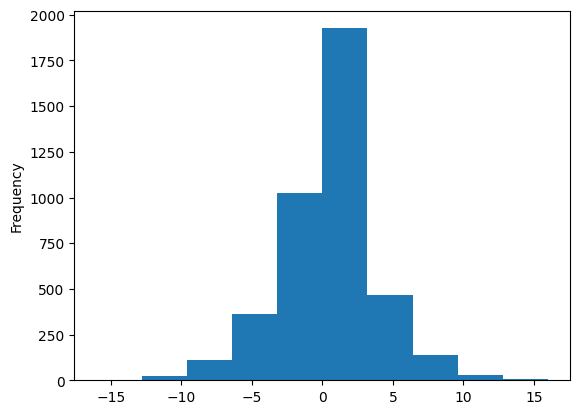

In [46]:
comb[comb['eventname']=='baseline_year_1_arm_1']['dersAWR_delta_7wave9'].plot.hist()

In [48]:
comb[comb['dersAWR_delta_7wave9']==0].shape

(786, 79)

<Axes: ylabel='Frequency'>

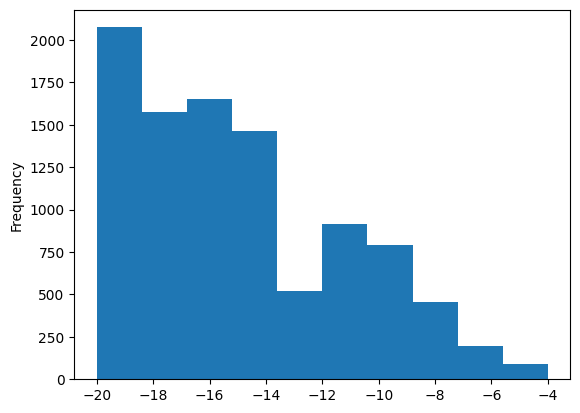

In [26]:
ders_pivot['dersAWR_3_year_follow_up_y_arm_1'].plot.hist()

In [49]:
comb[comb['eventname']=='baseline_year_1_arm_1']['dersAWR_3_year_follow_up_y_arm_1'].mean(), ders_pivot['dersAWR_3_year_follow_up_y_arm_1'].mean()

(-15.108068459657702, -15.101066295781177)

In [50]:
comb[comb['eventname']=='baseline_year_1_arm_1']['dersAWR_3_year_follow_up_y_arm_1'].describe()

count    4090.000000
mean      -15.108068
std         3.729357
min       -20.000000
25%       -18.000000
50%       -16.000000
75%       -13.000000
max        -4.000000
Name: dersAWR_3_year_follow_up_y_arm_1, dtype: float64

In [51]:
ders_pivot['dersAWR_3_year_follow_up_y_arm_1'].describe()

count    4314.000000
mean      -15.101066
std         3.742337
min       -20.000000
25%       -18.000000
50%       -16.000000
75%       -13.000000
max        -4.000000
Name: dersAWR_3_year_follow_up_y_arm_1, dtype: float64

In [52]:
comb.to_csv('data/rsfmri_insula_emot_reg_ders_awareness.csv', index=True)

In [349]:
comb.isnull().sum()

rsfmri_var_cdk_insulalh               0
rsfmri_var_cdk_insularh               0
rsfmri_var_cdk_rlaclatelh             0
rsfmri_var_cdk_rlaclaterh             0
rsfmri_var_cdk_entorhinallh           1
                                   ... 
rsfmri_c_ngd_sa_ngd_smm               0
rsfmri_c_ngd_sa_ngd_vta               3
rsfmri_c_ngd_sa_ngd_vs                0
dersTS_3_year_follow_up_y_arm_1       0
dersTS_4_year_follow_up_y_arm_1    5147
Length: 78, dtype: int64